In [ ]:
### Pythonのバージョン確認
import sys
print(sys.version)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


In [ ]:
import matplotlib.pyplot as plt
import math
import random

# フィールドの初期化

In [ ]:
### 壁の座標 (x, y) を保持する配列
wall_xs = []
wall_ys = []

max_x = 50 # [m]
max_y = 50 # [m]

### 下壁
for i in range(0, max_x):
    wall_xs.append(i)
    wall_ys.append(0)

### 上壁
for i in range(0, max_x):
    wall_xs.append(i)
    wall_ys.append(max_y - 1)

### 左壁
for i in range(0, max_y):
    wall_xs.append(0)
    wall_ys.append(i)

### 右壁
for i in range(0, max_y):
    wall_xs.append(max_x - 1)
    wall_ys.append(i)

print('wall_xs =', wall_xs)
print('wall_ys =', wall_ys)

wall_xs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49]
wall_ys = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49

In [ ]:
### 円形障害物の位置と半径 (x, y, r) を保持する配列
# ([m], [m], [m])
obs_circles = [
    (15, 35, 3),
    (20, 30, 5),
    (25, 25, 5),
    (30, 20, 5)
]

In [ ]:
### スタート位置とゴール位置の座標 (x, y) を保持する変数
start_x, start_y = 10, 10 # [m]
goal_x, goal_y = 40, 40 # [m]

In [ ]:
### 円形障害物を描画する関数
def DrawObsCircles(obs_circles):
    ### matplotlibで円を描画するにはAxesが必要なのでplt.subplots()を使う
    ### 注意 : plt.subplot() ではなく plt.subplot"s"()
    ### 参考 : https://stackoverflow.com/questions/9215658/plot-a-circle-with-pyplot
    fig, ax = plt.subplots()
    for obs_circle_x, obs_circle_y, obs_circle_r in obs_circles:
        circle = plt.Circle((obs_circle_x, obs_circle_y), obs_circle_r, color='black')
        ax.add_artist(circle)

    return



### フィールドを描画する関数
def DrawField(wall_xs, wall_ys, start_x, start_y, goal_x, goal_y):
    plt.scatter(wall_xs, wall_ys, marker='.', color='black')
    plt.scatter(start_x, start_y, marker='x', color='blue')
    plt.scatter(goal_x, goal_y, marker='x', color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')
    plt.grid(True)

    return

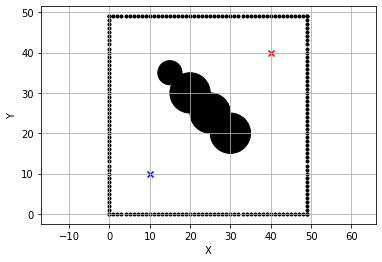

In [ ]:
DrawObsCircles(obs_circles)
DrawField(wall_xs, wall_ys, start_x, start_y, goal_x, goal_y)

# 経路探索アルゴリズムに使うデータ構造や関数の準備

In [ ]:
class Node:
    def __init__(self, x, y):
        self.x = x # [m]
        self.y = y # [m]
        self.path_xs = []
        self.path_ys = []
        self.parent_node = None

In [ ]:
### ノードリストの中でランダムノードに最も近いノードを探して返す関数
### ユークリッド距離 [m] でも二乗距離 [m^2] でも大小関係は変わらないので,
### 計算時間削減のためわざわざルートを取らず二乗距離のまま大小比較している
def FindNearestNode(nodes, rand_node):
    nearest_square_dist = sys.float_info.max # [m^2]
    nearest_node = None

    for node in nodes:
        square_dist = (rand_node.x - node.x)**2 + (rand_node.y - node.y)**2 # [m^2]
        if square_dist < nearest_square_dist: 
            nearest_square_dist = square_dist
            nearest_node = node

    return nearest_node

In [ ]:
### from_node から to_node 方面に直線的に expand_dist [m] だけ伸ばした位置に new_node を作る関数
def ExpandNode(expand_dist, path_resolution, from_node, to_node):
    ### new_node を from_node で初期化
    new_node = Node(from_node.x, from_node.y)
    new_node.path_xs = [new_node.x]
    new_node.path_ys = [new_node.y]

    ### new_node から to_node までの距離と角度
    dx = to_node.x - new_node.x # [m]
    dy = to_node.y - new_node.y # [m]
    dist = math.sqrt(dx**2 + dy**2) # [m]
    theta = math.atan2(dy, dx) # [rad]

    ### 移動距離解像度 path_resolution [m/step] に従って伸ばす回数 num_expand [step] を計算してその回数分だけ伸ばす
    ### ただしもし to_node が元々近くて new_node から to_node までの距離 dist [m] の方が expand_dist [m] より短いなら，
    ### 短い方の距離を基に num_expand [step] を計算する
    num_expand = math.floor(min(expand_dist, dist) / path_resolution) # [step] = [m] / [m/step]
    for i in range(num_expand):
        new_node.x += path_resolution * math.cos(theta)
        new_node.y += path_resolution * math.sin(theta)
        new_node.path_xs.append(new_node.x)
        new_node.path_ys.append(new_node.y)

    ### もし伸ばした後の new_node から to_node までの距離が移動距離解像度 path_resolution [m/step] より短いなら，
    ### to_node まで繋げてしまう
    last_dist = math.sqrt((to_node.x - new_node.x)**2 + (to_node.y - new_node.y)**2) # [m]
    if last_dist <= path_resolution:
        new_node.path_xs.append(to_node.x)
        new_node.path_ys.append(to_node.y)

    ### new_node の親ノードは出発地点の from_node になる
    new_node.parent_node = from_node

    return new_node

In [ ]:
### 円形障害物の中心とノードの経路各点との距離を見て衝突判定する関数
### ユークリッド距離 [m] でも二乗距離 [m^2] でも大小関係は変わらないので,
### 計算時間削減のためわざわざルートを取らず二乗距離のまま大小比較している
def CheckCollision(node, obs_circles):
    assert len(node.path_xs) == len(node.path_ys)
    num_path = len(node.path_xs)

    for obs_circle_x, obs_circle_y, obs_circle_r in obs_circles:
        for i in range(num_path):
            dx = node.path_xs[i] - obs_circle_x
            dy = node.path_ys[i] - obs_circle_y
            if (dx**2 + dy**2) < obs_circle_r**2: # [m^2]
                ### 衝突あり : アウト
                return False

    ### 衝突なし : セーフ
    return True

In [ ]:
def DrawNodes(nodes, rand_node):
    for node in nodes:
        if node.parent_node is not None:
            plt.scatter(node.path_xs, node.path_ys, marker='.', color='gray', s=1)

    if rand_node is not None:
        plt.scatter(rand_node.x, rand_node.y, marker='*', color='lime')

    return

# RRTによる経路探索

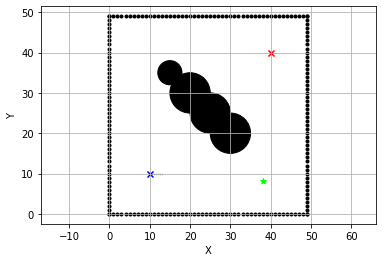

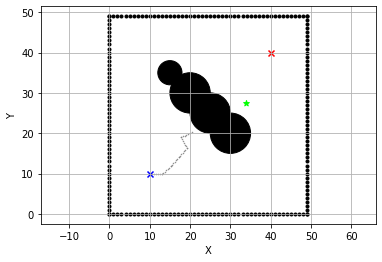

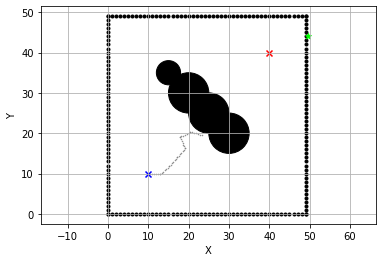

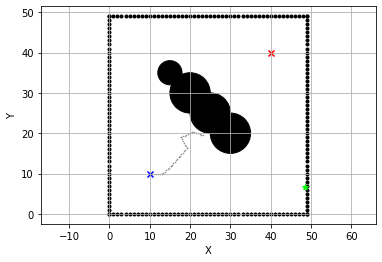

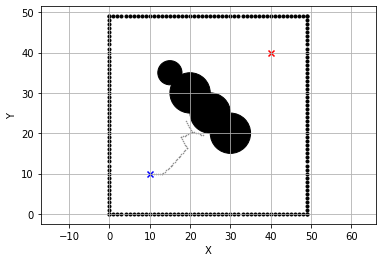

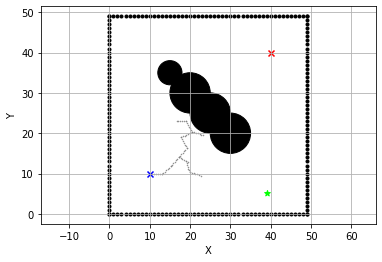

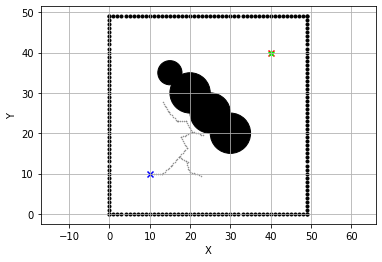

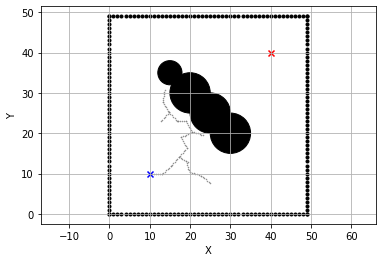

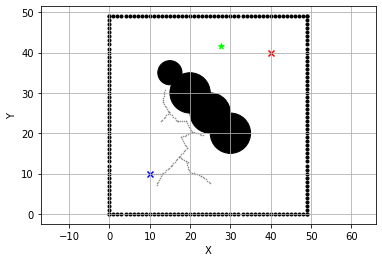

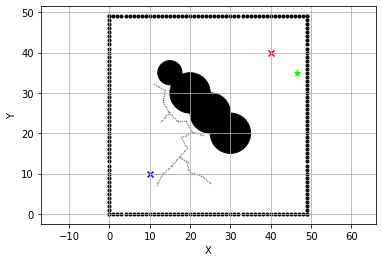

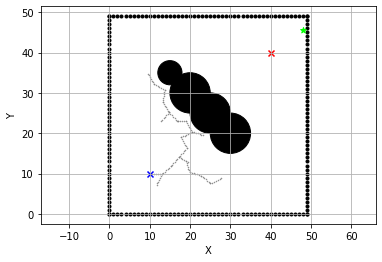

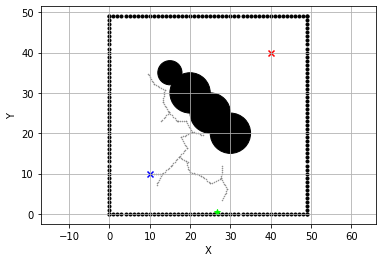

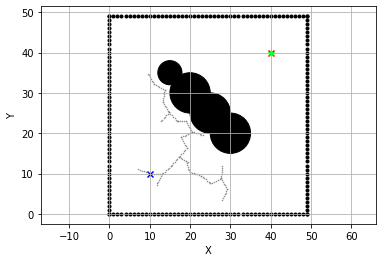

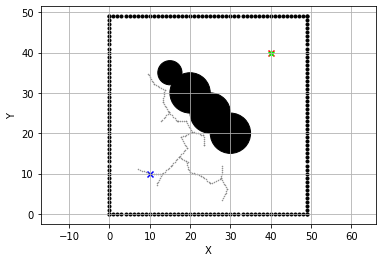

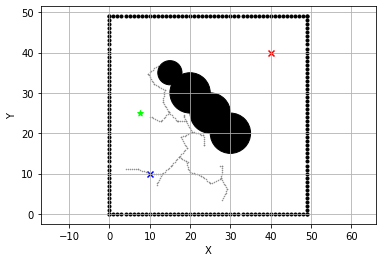

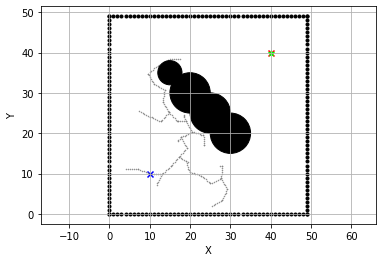

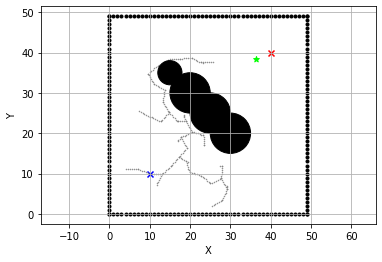

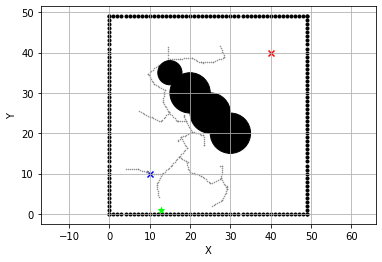

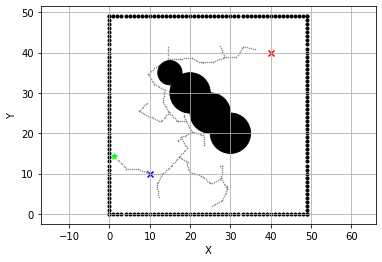

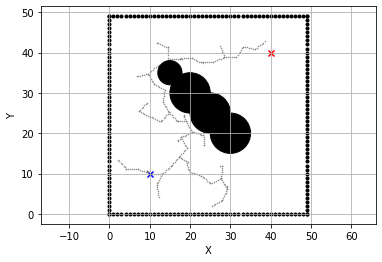

Goal !!! 

iteration = 98


In [ ]:
expand_dist = 3.0 # [m]
path_resolution = 0.5 # [m/step]
goal_sampling_rate = 5 # [%]
max_iteration = 300 # [回]

start_node = Node(start_x, start_y)
goal_node = Node(goal_x, goal_y)

nodes = [start_node]

draw_iteration = 5
for iteration in range(max_iteration):
    ### フィールド内のランダムな座標にノードを一旦置く
    ### ただし100回の内 goal_sampling_rate 回はランダムな座標ではなくゴール座標を指定する
    ### こうすることで完全なランダムで乱れ打ちするより早めにゴールに到達しやすくなる
    if random.randint(0, 100) <= goal_sampling_rate:
        rand_node = Node(goal_x, goal_y)
    else:
        rand_node = Node(random.uniform(0.0, max_x), random.uniform(0.0, max_y))

    ### ランダムノードに最も近いノードからランダムノード方面に直線上に一定の距離だけ経路を伸ばしていく
    nearest_node = FindNearestNode(nodes, rand_node)
    new_node = ExpandNode(expand_dist, path_resolution, from_node=nearest_node, to_node=rand_node)

    ### もし障害物に衝突しないなら,ノードリストに注目ノードを追加して保存する
    if CheckCollision(new_node, obs_circles):
        nodes.append(new_node)

    ### もしノードリスト中の最新ノードがゴールに十分近く,かつ障害物に衝突しないなら,経路探索を終了する
    latest_node = nodes[-1]
    dist_to_goal = math.sqrt((latest_node.x - goal_node.x)**2 + (latest_node.y - goal_node.y)**2) # [m] 
    if dist_to_goal <= expand_dist:
        final_node = ExpandNode(expand_dist, path_resolution, from_node=latest_node, to_node=goal_node)
        if CheckCollision(final_node, obs_circles):
            print('Goal !!! \n')
            break

    ### 繰り返し数が draw_itr 回ごとに探索の途中経過を描画
    if iteration % draw_iteration == 0:
        DrawObsCircles(obs_circles)
        DrawField(wall_xs, wall_ys, start_x, start_y, goal_x, goal_y)
        DrawNodes(nodes, rand_node)
        plt.pause(0.001)
### End of for

print('iteration =', iteration)

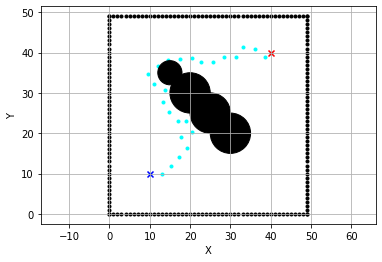

In [ ]:
### 探索した最終経路の始まりはゴール位置から
final_path_xs = [goal_x]
final_path_ys = [goal_y]

### 最後にノードリストに追加されたノードから親ノードIDを辿ってスタートノードに辿り着くまで（つまり node.parent_node が None になるまで）繰り返し
node = nodes[-1]
while node.parent_node is not None:
    final_path_xs.append(node.x)
    final_path_ys.append(node.y)
    node = node.parent_node

### スタート位置も最終経路に追加
final_path_xs.append(start_x)
final_path_ys.append(start_y)

### 探索した最終経路とフィールドを描画
DrawObsCircles(obs_circles)
plt.scatter(final_path_xs, final_path_ys, marker='.', color='cyan')
DrawField(wall_xs, wall_ys, start_x, start_y, goal_x, goal_y)